#  Прогнозирование оттока клиентов оператора связи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. 

Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Оглавление

<a id='intro'></a>
[1. Изучение общей информации](#task1).

[2. Предобработка данных](#task2).
   
[3. Исследовательский анализ данных](#task3).

[4. Обучение моделей](#task4).

   - [4.1 Модель LogisticRegression](#task4.1).
   - [4.2 Модель RandomForestClassifier](#task4.2).
   - [4.3 Модель CatBoostClassifier](#task4.3).

[5. Тестирование](#task5).

[6. Отчет по работе](#task6).

# Описание услуг

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Данные также находятся в тренажёре, в папке `/datasets/`.

# Цели исследования

Построить модель для предсказания оттока клиентов оператора с метрикой `AUC-ROC не меньше 0.85`, по которой можно будет удержать клиента с помощью дополнительных предложений.

# Описание данных

**Признаки:**
- BeginDate — дата начала пользования услугами,
- EndDate — дата окончания пользования услугами,
- Type — тип оплаты: ежемесячный, годовой и тд
- PaperlessBilling — безналичный расчет,
- PaymentMethod — способ оплаты,
- MonthlyCharges — ежемесячные траты на услуги,
- TotalCharges — всего потрачено денег на услуги
- Dependents — наличие иждивенцев
- SeniorCitizen — наличие пенсионного статуса по возрасту
- Partner — наличие супруга(и)
- MultipleLines — наличие возможности ведения параллельных линий во время звонка

**Данные состоят из файлов, полученных из разных источников:**

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# План работы

1. Изучение общей информации
2. Предобработка данных
    - удаление пропусков;
    - обработка аномальных значений;
    - изменение типов данных;
    - обработка дубликатов.
3. Исследовательский анализ данных
4. Обучение моделей
       4.1  Модель LogisticRegression
       4.2  Модель RandomForestClassifier
       4.3  Модель CatBoostClassifier
5. Тестирование
6. Отчет по работе

[Оглавление](#intro).
<a id='task1'></a>

## 1. Изучение общей информации

**Импортируем необходимые библиотеки вначале документа (pandas, numpy, matplotlib.pyplot и другие).**

In [1]:
import sys
!"{sys.executable}" -m pip install phik

In [2]:
import os
import pandas as pd
import numpy as np

# graph
import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

**Дата выгрузки данных**

In [3]:
data_load = '2020-02-01'

**Считаем данные из csv-файла и сохраним в переменную `contract`. Путь к файлу: `/datasets/contract_new.csv`**

In [4]:
if os.path.exists('/datasets/contract_new.csv'):
    contract = pd.read_csv('/datasets/contract_new.csv', index_col=[0])
elif os.path.exists('C:/Users/User/Desktop/DS Python/Projects/contract_new.csv'):
    contract = pd.read_csv('C:/Users/User/Desktop/DS Python/Projects/contract_new.csv', index_col=[0])
else:
    print('Something is wrong')

**Считаем данные из csv-файла и сохраним в переменную `personal`. Путь к файлу: `/datasets/personal_new.csv`**

In [5]:
if os.path.exists('/datasets/personal_new.csv'):
    personal = pd.read_csv('/datasets/personal_new.csv', index_col=[0])
elif os.path.exists('C:/Users/User/Desktop/DS Python/Projects/personal_new.csv'):
    personal = pd.read_csv('C:/Users/User/Desktop/DS Python/Projects/personal_new.csv', index_col=[0])
else:
    print('Something is wrong')

**Считаем данные из csv-файла и сохраним в переменную `internet`. Путь к файлу: `/datasets/internet_new.csv`**

In [6]:
if os.path.exists('/datasets/internet_new.csv'):
    internet = pd.read_csv('/datasets/internet_new.csv', index_col=[0])
elif os.path.exists('C:/Users/User/Desktop/DS Python/Projects/internet_new.csv'):
    internet = pd.read_csv('C:/Users/User/Desktop/DS Python/Projects/internet_new.csv', index_col=[0])
else:
    print('Something is wrong')

**Считаем данные из csv-файла и сохраним в переменную `phone`. Путь к файлу: `/datasets/phone_new.csv`**

In [7]:
if os.path.exists('/datasets/phone_new.csv'):
    phone = pd.read_csv('/datasets/phone_new.csv', index_col=[0])
elif os.path.exists('C:/Users/User/Desktop/DS Python/Projects/phone_new.csv'):
    phone = pd.read_csv('C:/Users/User/Desktop/DS Python/Projects/phone_new.csv', index_col=[0])
else:
    print('Something is wrong')

**Выведем первые 5 строк датафрейма `contract` на экран.**

In [8]:
contract.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


**Выведем первые 5 строк датафрейма `personal` на экран.**

In [9]:
personal.head()

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


**Выведем первые 5 строк датафрейма `internet` на экран.**

In [10]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


**Выведем первые 5 строк датафрейма `phone` на экран.**

In [11]:
phone.head()

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


**Выведем основную информацию о данных датасетах с помощью метода info().**

In [12]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


**Выведем информацию о количестве пропусков по столбцам в данном датасете с помощью метода isna() в процентах.**|

In [13]:
pd.DataFrame(round(contract.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
BeginDate,0.000000
EndDate,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000


Явных пропусков нет. 

Так как тип данных еще не откорректирован, то проверим на пропуски отдельно столбец TotalCharges, который должен быть численным типом данных, но оказался object.

In [14]:
len(contract[contract['TotalCharges'] == ' '])

11

**Проверим, есть ли подозрительные и выбивающиеся данные в датасете `contract`**. 

In [15]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [16]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


**Выведем информацию о количестве пропусков по столбцам в данном датасете с помощью метода isna() в процентах.**|

In [17]:
pd.DataFrame(round(personal.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000


**Проверим, есть ли подозрительные и выбивающиеся данные в датасете `personal`**. 

In [18]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


**Выведем информацию о количестве пропусков по столбцам в данном датасете с помощью метода isna() в процентах.**|

In [20]:
pd.DataFrame(round(internet.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000


In [21]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


**Выведем информацию о количестве пропусков по столбцам в данном датасете с помощью метода isna() в процентах.**|

In [22]:
pd.DataFrame(round(phone.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
MultipleLines,0.000000


**Вывод:**
1. Импортировали необходимые библиотеки.
2. Считали данные из csv-файла.
3. Вывели общую информацию по датафрейму `contract`: 
    - в датафрейме 7 столбцов и 7043 строки;
    - столбцы не корректно названны (не в змеином стиле);
    - в датасете отсутствуют пропуски;
    - общая занимаемая память 440.2 КB.
    
   Вывели общую информацию по датафрейму `personal`: 
    - в датафрейме 4 столбца и 7043 строки;
    - столбцы не корректно названны (не в змеином стиле);
    - в датасете отсутствуют пропуски;
    - общая занимаемая память 275.1 КB.
    
   Вывели общую информацию по датафрейму `internet`: 
    - в датафрейме 7 столбцов и 5517 строки;
    - столбцы не корректно названны (не в змеином стиле);
    - в датасете отсутствуют пропуски;
    - общая занимаемая память 344.8 КB.
    
   Вывели общую информацию по датафрейму `phone`: 
    - в датафрейме 1 столбец и 6361 строка;
    - столбцы не корректно названны (не в змеином стиле);
    - в датасете отсутствуют пропуски;
    - общая занимаемая память 99.2 КB.
    
4. Подготовились к этапу 'Предобработка данных'.

На этапе предобработки данных предполагается:
 - корректно назвать столбцы с признаками,
 - вручную ввести классификацию признаков и изменить тип данных некоторых признаков (EndDate, TotalCharges и др.),
 - объединить таблицы в одну для этапа "Исследовательский анализ данных".

[Оглавление](#intro).
<a id='task2'></a>

## 2. Предобработка данных

**Стиль заголовков сделан в 'верблюжьем' регистре, переведем все в 'змеиный' регистр.**

Напишем функцию перевода:

In [23]:
# функция получает на вход список из наименований, а также задан разделитель
def camel_to_snake(columns, sep='_'): 
    # новый список, который будет формироваться из новых наименований
    columns_new = [] 
    # переберем каждое слово списка
    for column in columns:
        # новое слово в змеином регистре
        snake_register = ''
        # перебираем каждое слово по букве
        for i in column:
            # если встретили символ в верхнем регистре
            if i.isupper(): 
                # добавим разделитель и этот символ в нижнем регистре
                snake_register += sep + i.lower()
            else:
                snake_register += i
        snake_register = snake_register.lstrip(sep)
        # добавим новое слово в новый список 
        columns_new.append(snake_register)
    return columns_new

Переименуем все названия столбцов и выведем 10 первых строк каждого датасета с новыми названиями колонн.

In [24]:
contract.columns = camel_to_snake(contract.columns)
contract.head(10)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68


In [25]:
personal.columns = camel_to_snake(personal.columns)
personal.head(10)

,gender,senior_citizen,partner,dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
9305-CDSKC,Female,0,No,No
1452-KIOVK,Male,0,No,Yes
6713-OKOMC,Female,0,No,No
7892-POOKP,Female,0,Yes,No


In [26]:
internet.columns = camel_to_snake(internet.columns)
internet.head(10)

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
6713-OKOMC,DSL,Yes,No,No,No,No,No
7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes


In [27]:
phone.columns = camel_to_snake(phone.columns)
phone.head(10)

,multiple_lines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
7892-POOKP,Yes
6388-TABGU,No
9763-GRSKD,No
7469-LKBCI,No


**Столбцы названы корректно.**

Далее проанализируем пропуски в датасетах. 

**Рассмотрим датасет `contract`, так как пропуски были обнаружены только в столбце 'total_charges'**.

In [28]:
contract[contract['total_charges'] == ' ']

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


Как видно из таблицы, пропуски в столбце **'total_charges'** (всего потрачено денег на услуги) связаны с тем, что пользование услугами началось 1 февраля 2020 года. То есть по факту выгрузки столбец **'total_charges'** будет равен столбцу **'monthly_charges'** (ежемесячные траты на услуги). 

**Так как количество таких значений 11 штук - можно спокойно удалить данные строки.** Но в данном случае можно сохранить данные значения, так как логически понятно,какие значения можно внести вместо пропущенных, но для моделей данные строки не будут нести никакой полезной информации. 

In [29]:
contract = contract[contract['total_charges'] != ' ']

**Теперь преобразуем тип данных для столбцов: 'total_charges', 'begin_date' и 'end_date'.**

In [30]:
contract['total_charges'] = contract['total_charges'].astype('float')

In [31]:
contract['begin_date'] = contract['begin_date'].astype('datetime64')

Но с типом данных 'end_date' получается интересно, в данном случае он `'object'`. То есть, если договор еще действует, то стоит значение 'No'. Если договор не продлен, то дата окончания. 

Так как выгрузка данных проведена 1 февраля 2020г. - можно заполнить все значения, где стоит 'No', датой выгрузки.

In [32]:
contract.loc[contract['end_date'] == 'No', 'end_date'] = data_load

In [33]:
contract['end_date'] = contract['end_date'].astype('datetime64')

In [34]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   datetime64[ns]
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 439.5+ KB


**Создадим целевой признак на основе столбца 'end_date'**. 

Где значение 1 - это потерянный клиент, а значение 0 - действующий клиент. 

In [35]:
contract.loc[contract['end_date'] == data_load, 'miss'] = 0
contract.loc[contract['end_date'] != data_load, 'miss'] = 1
contract['miss'] = contract['miss'].astype('int8')

**Создадим новый признак на основе столбца 'end_date' и 'begin_date', который покажет сколько времени клиент пользовался услугами компании.** 

In [36]:
contract['days'] = (contract['end_date'] - contract['begin_date']).dt.days

In [37]:
contract.head(10)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,miss,days
customerID,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337
1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671
6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0,306
7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945


**Теперь удалим признаки 'begin_date' и 'end_date', чтобы избежать утечки данных.**

In [38]:
contract = contract.drop(columns=['begin_date', 'end_date'], axis=1)

In [39]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7032 non-null   object 
 1   paperless_billing  7032 non-null   object 
 2   payment_method     7032 non-null   object 
 3   monthly_charges    7032 non-null   float64
 4   total_charges      7032 non-null   float64
 5   miss               7032 non-null   int8   
 6   days               7032 non-null   int64  
dtypes: float64(2), int64(1), int8(1), object(3)
memory usage: 391.4+ KB


**Рассмотрим датасет  `personal`**

In [40]:
personal['senior_citizen'] = personal['senior_citizen'].astype('int8')

**Теперь объединим датасеты в один единый датасет с признаками и целевым признаком 'miss'.**

In [41]:
data = (contract.merge(personal, on='customerID',  how='left')
               .merge(internet, on='customerID',  how='left')
               .merge(phone, on='customerID',  how='left'))

In [42]:
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,miss,days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [43]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
type,0.000000
paperless_billing,0.000000
payment_method,0.000000
monthly_charges,0.000000
total_charges,0.000000
miss,0.000000
days,0.000000
gender,0.000000
senior_citizen,0.000000
partner,0.000000


Просмотрим строки с пропущенными значениями.

In [44]:
data[data.isna().any(1)].head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,miss,days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
6713-OKOMC,Month-to-month,No,Mailed check,29.75,300.48,0,306,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
7469-LKBCI,Two year,No,Credit card (automatic),18.95,312.30,0,488,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8191-XWSZG,One year,No,Mailed check,20.65,1106.01,0,1584,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Каждый клиент мог использовать либо услугу стационарная телефонная связь, либо Интернет, либо обе услуги одновременно.

**То есть, если клиента нет в таблице `internet`, то он просто не использует данную услугу. Тогда пропущенные значения в данной таблице можно заполнить значением 'No'.**

In [45]:
data = data.fillna('No')

In [46]:
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,miss,days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


**Вывод:**
1. Исправили названия столбцов.
2. Изменили тип данных некоторых признаков там, где это было необходимо.
3. Датасеты объединены в одну общую таблицу для дальнейшего анализа. 
4. Пропуски устранены.

[Оглавление](#intro).
<a id='task3'></a>

## 3. Исследовательский анализ данных

**Построим и визуализируем матрицу корреляции признаков чтобы оценить степень скоррелированности признаков.**

In [47]:
phik_overview = data.phik_matrix()

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'miss', 'days', 'senior_citizen']


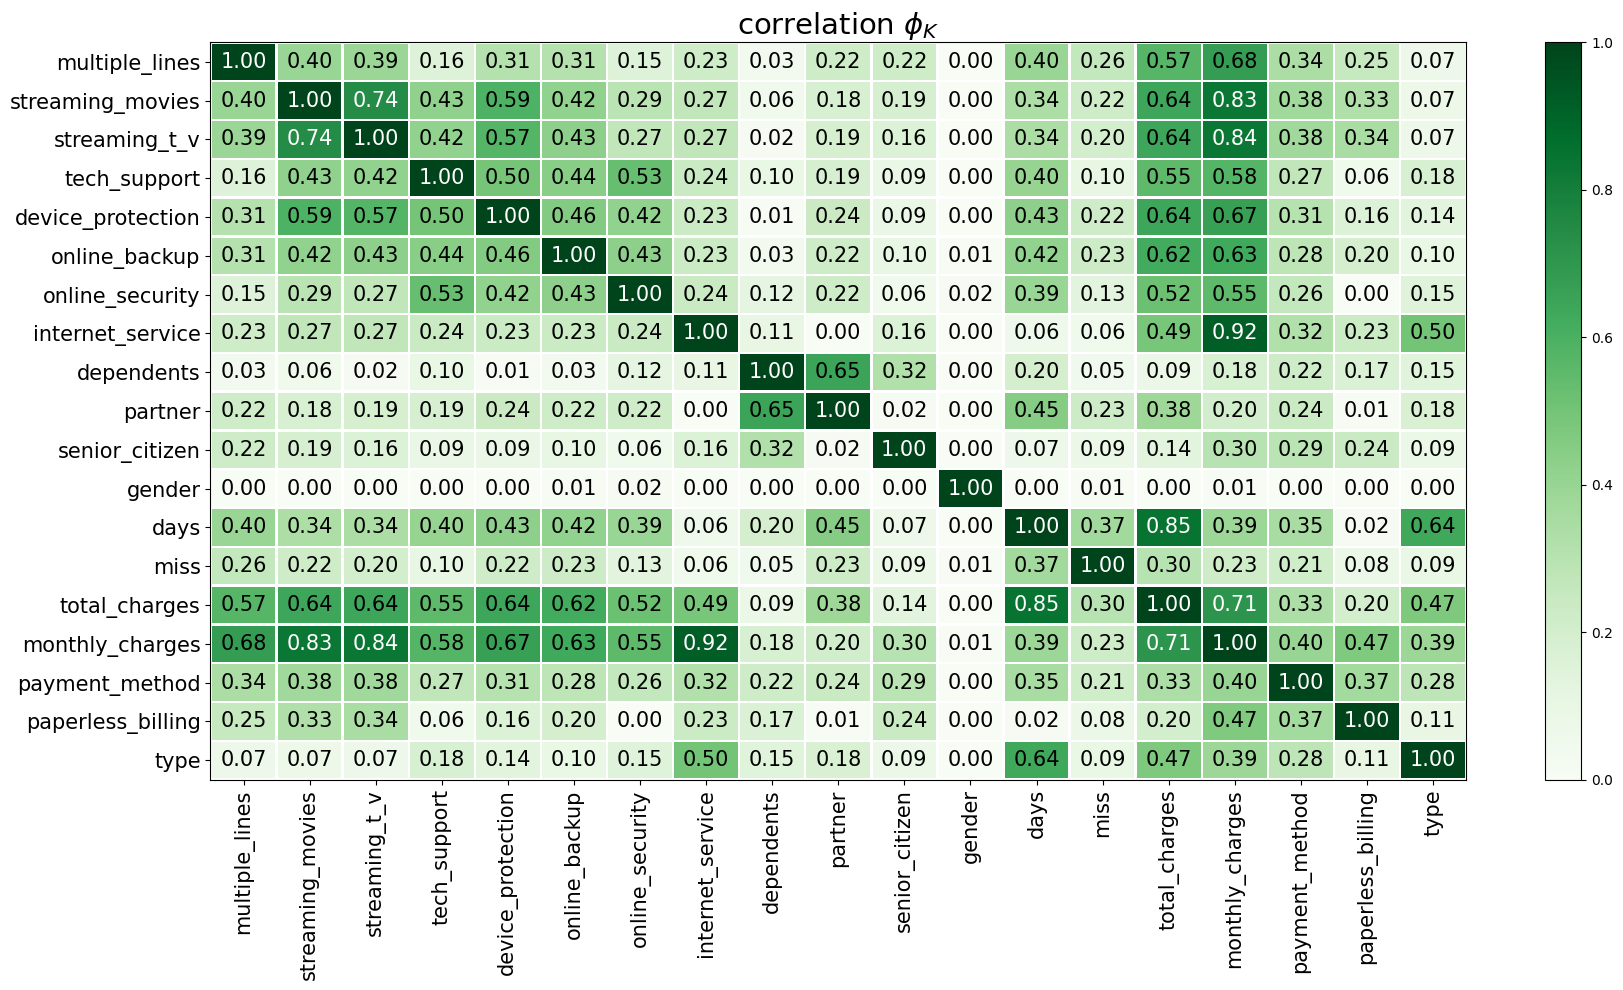

In [48]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(18, 10))
plt.tight_layout()

Тут есть высокая корреляция между ежемесячными тратами и видами услуг, которые предоставляются клиентам ('internet_service', 'streaming_t_v', 'streaming_movies'). Но это, как мне кажется, можно объяснить тем, что эти сервисы приносят наибольшее количество прибыли в месяц.

Корреляция между месячными платежами и услугами может быть не линейная и на линейную модель она не повлияет

Также есть высокая корреляция между днями пользования и всего потраченных денег на услуги ('total_charges'), что тоже объяснимо.. 

**Проверим, есть ли подозрительные и выбивающиеся данные в датасете `data`**. 

In [49]:
data.describe()

,monthly_charges,total_charges,miss,days,senior_citizen
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2118.621822,0.156570,899.961320,0.162400
std,30.085974,2112.736199,0.363421,682.738777,0.368844
min,18.250000,19.050000,0.000000,28.000000,0.000000
25%,35.587500,439.745000,0.000000,276.000000,0.000000
50%,70.350000,1345.275000,0.000000,761.000000,0.000000
75%,89.862500,3239.317500,0.000000,1461.000000,0.000000
max,118.750000,9221.380000,1.000000,2314.000000,1.000000


Явно выбивающихся значений не обнаружено. 

Данная функция дает информацию о количественных признаках. Чтобы убрать выборсы по цене более эффективно - рассмотрим каждую переменную в отдельности графическим способом.

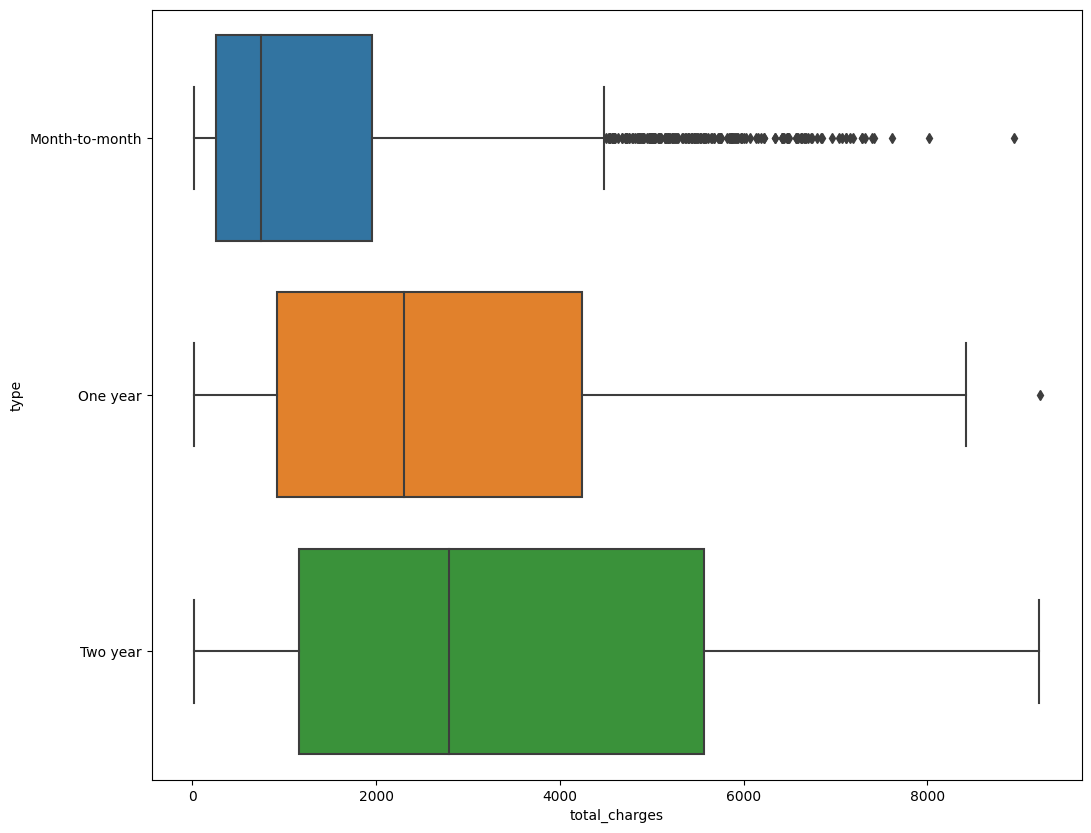

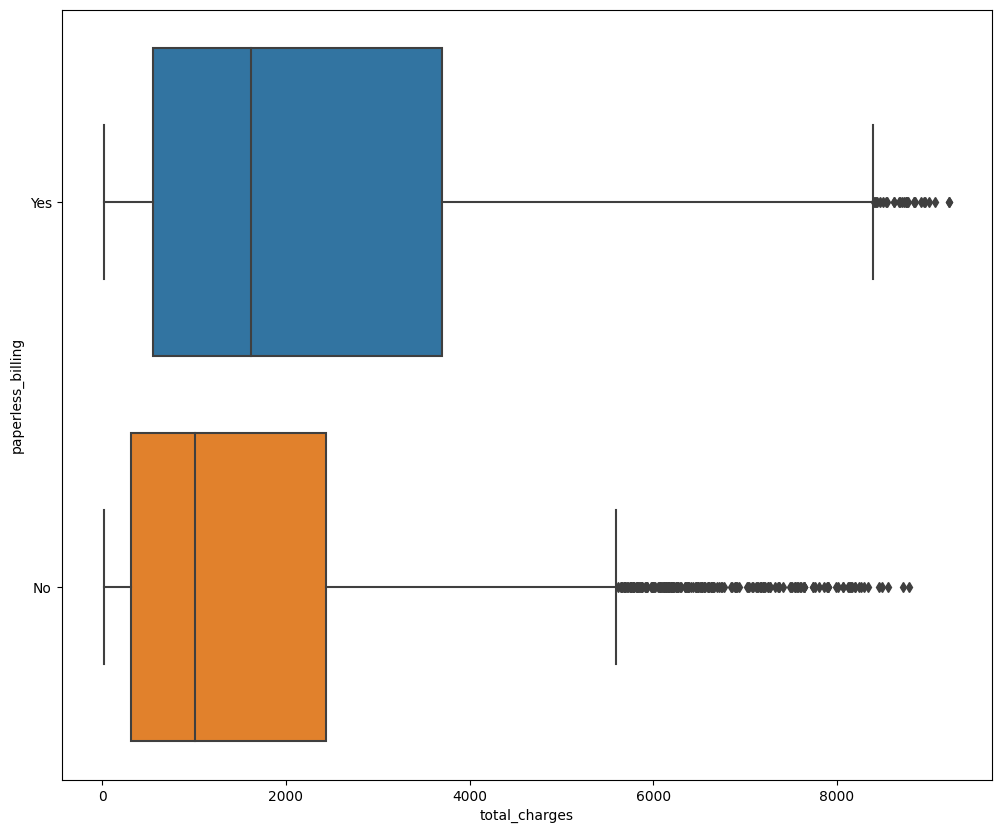

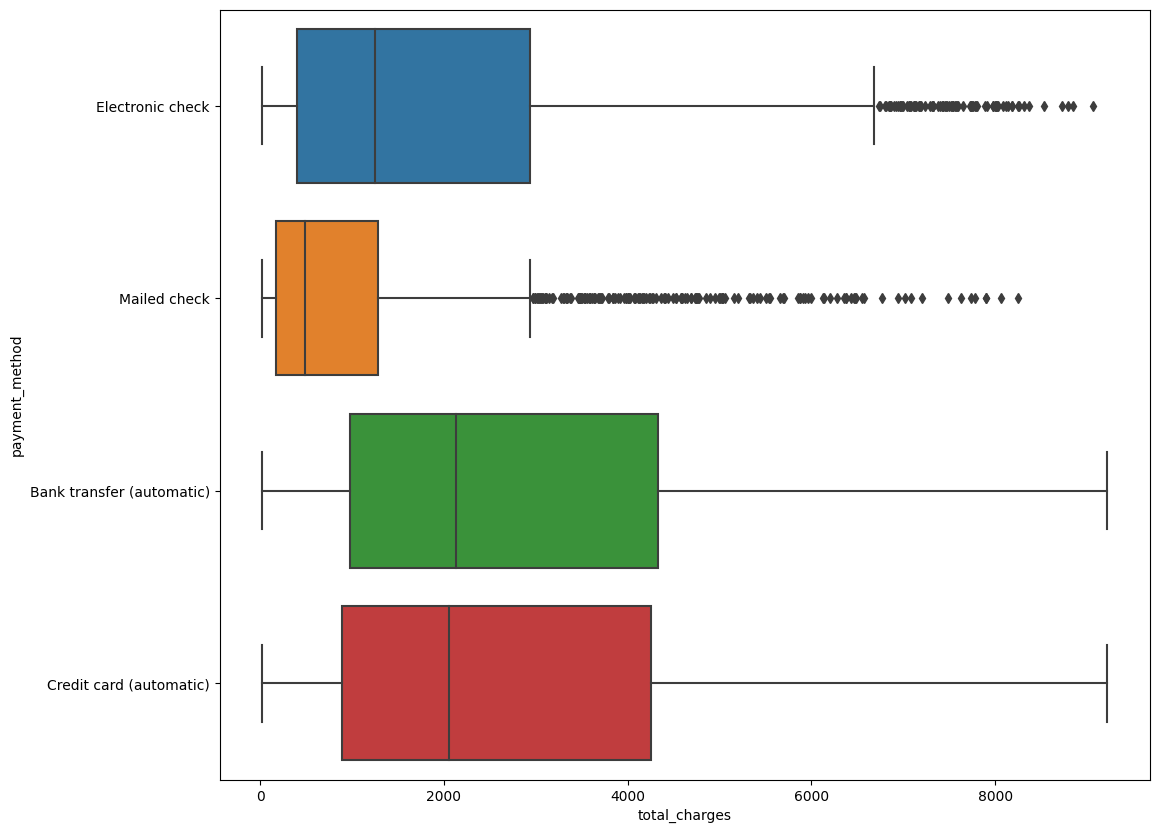

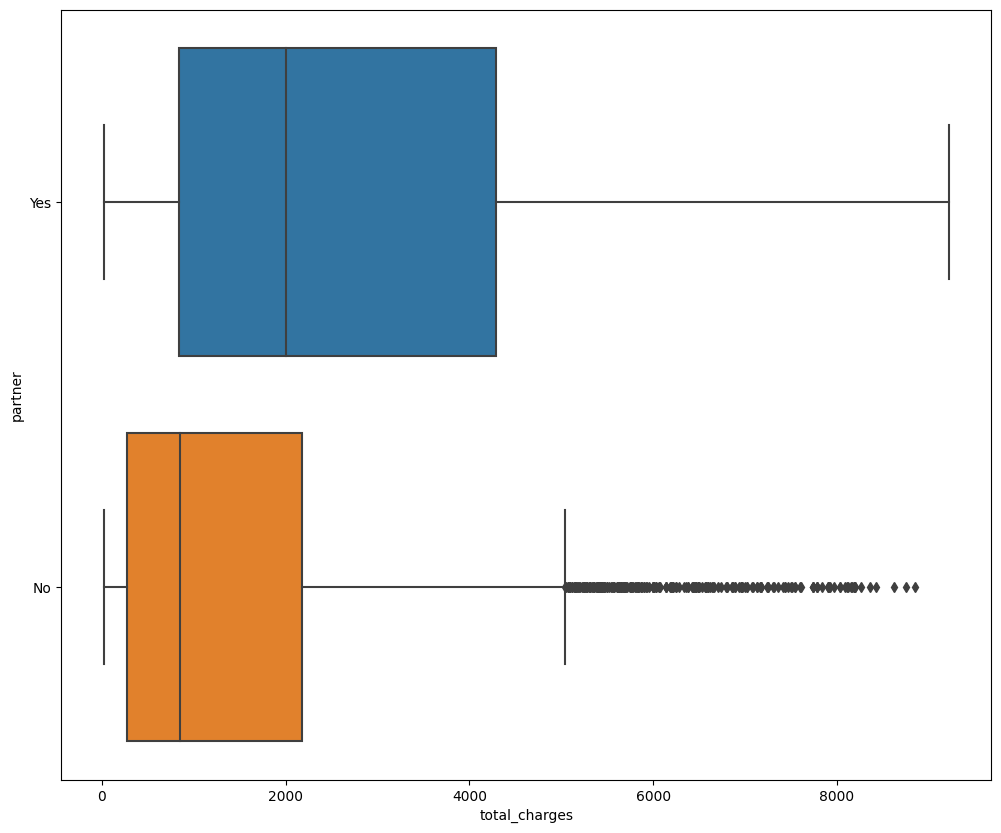

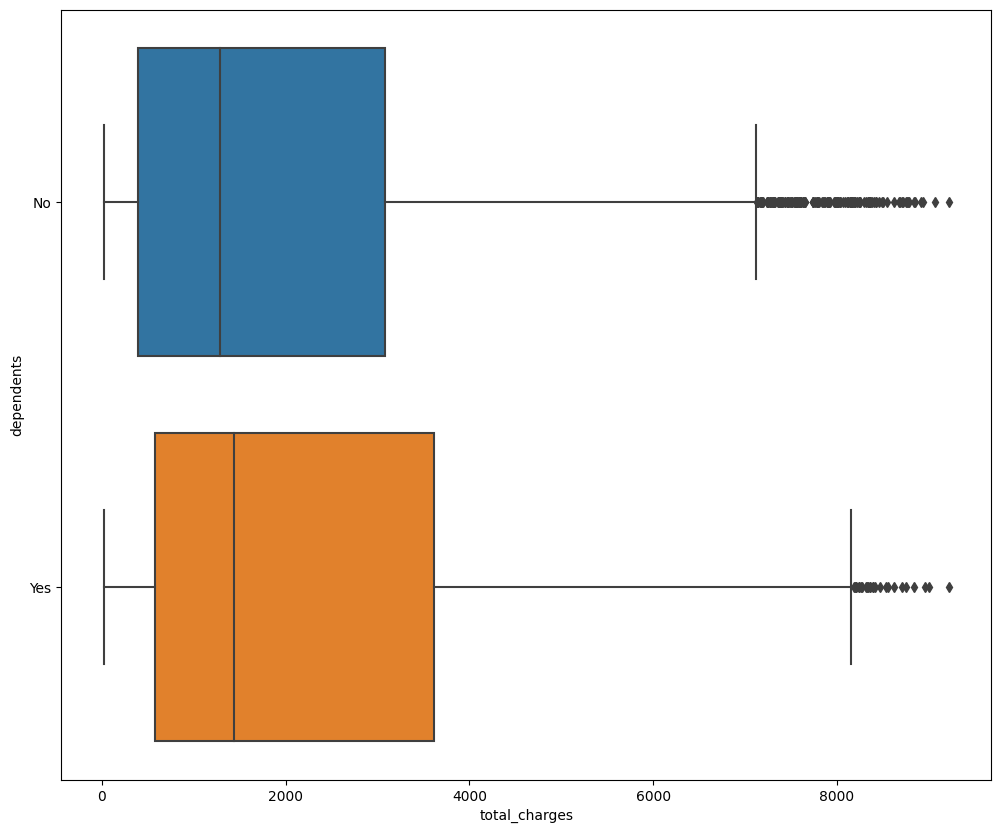

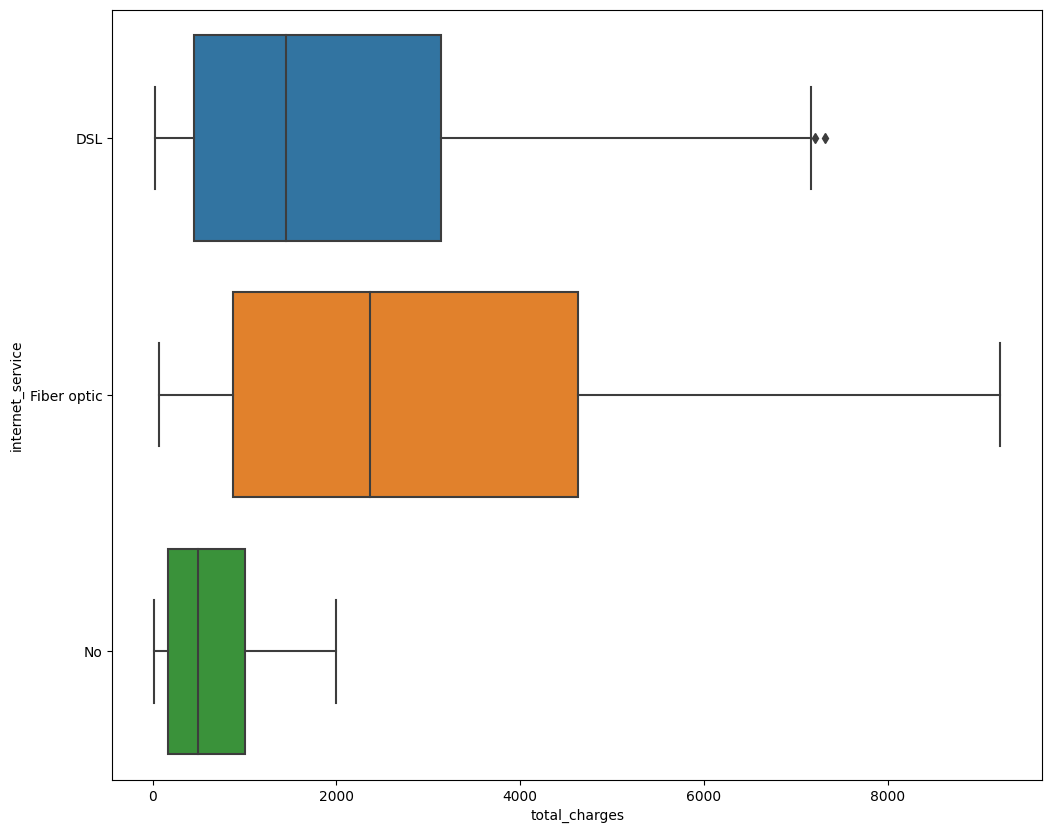

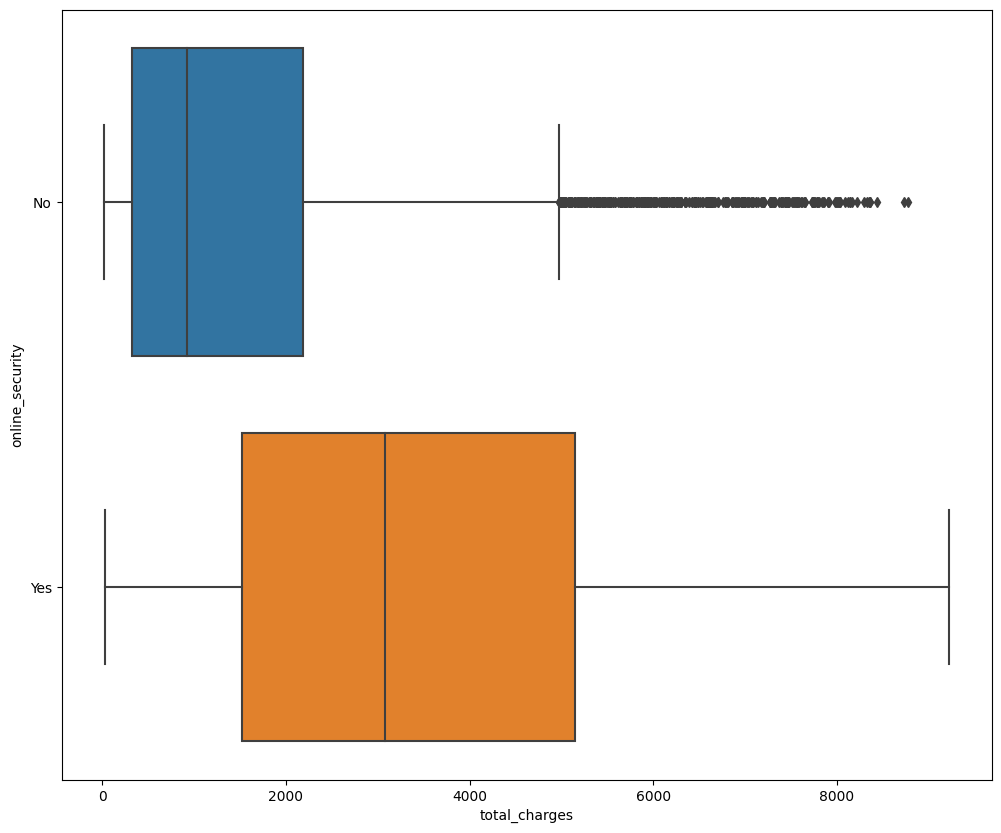

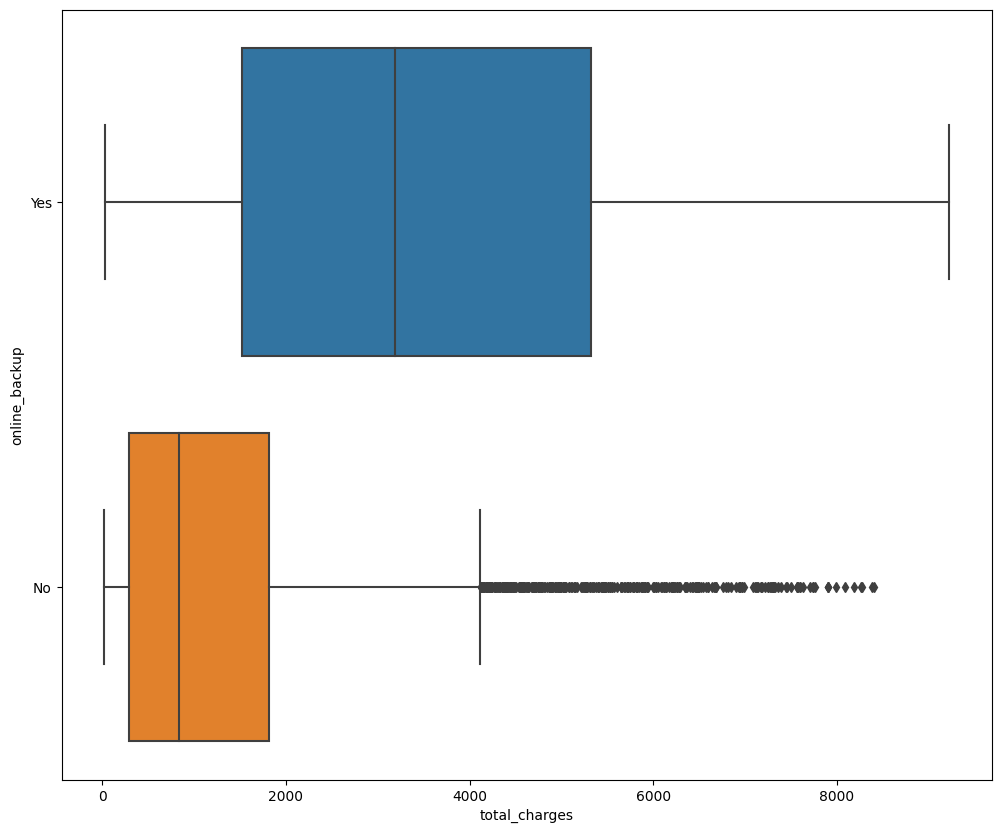

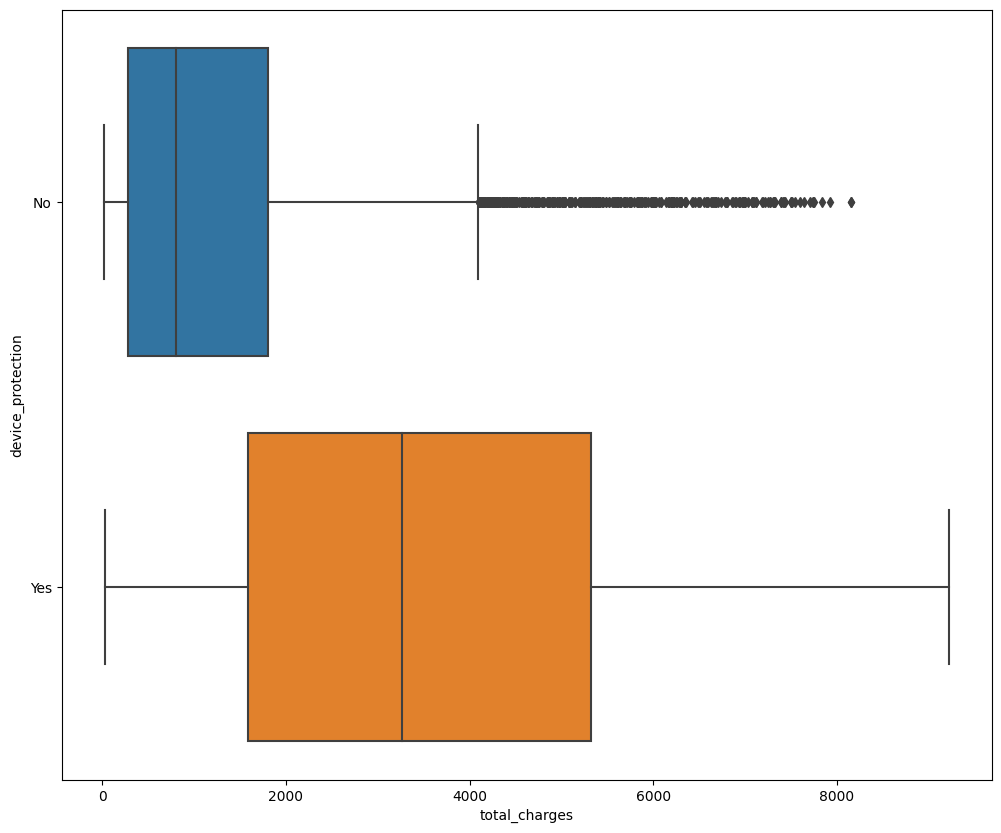

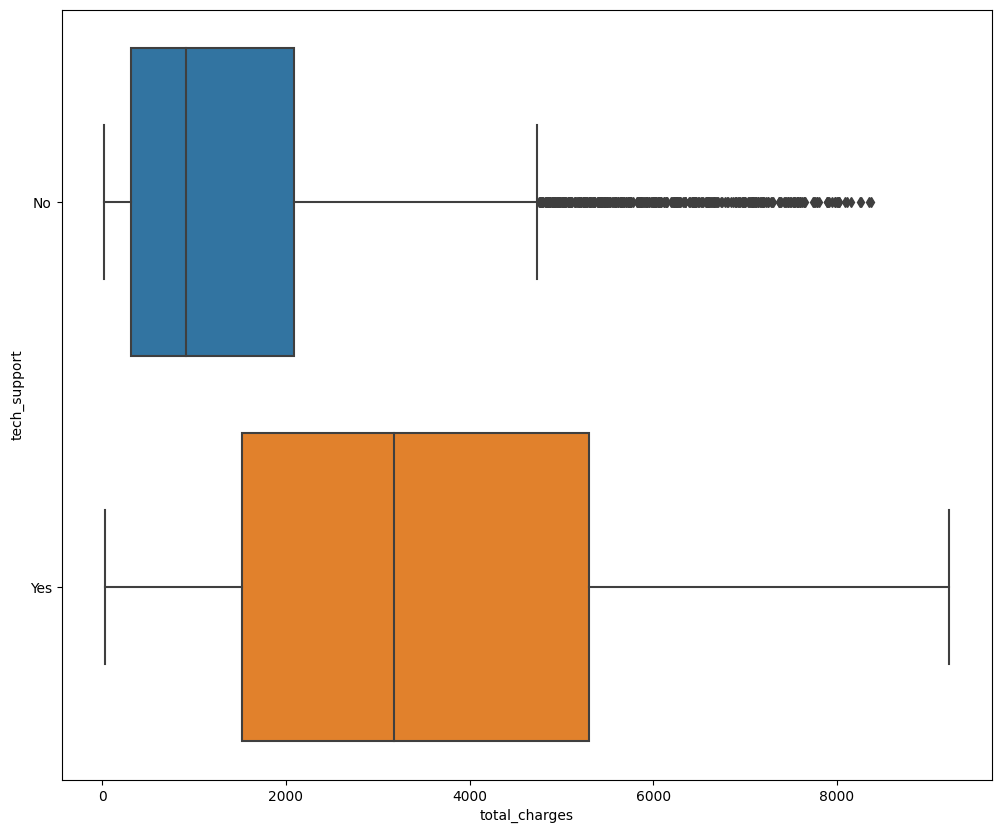

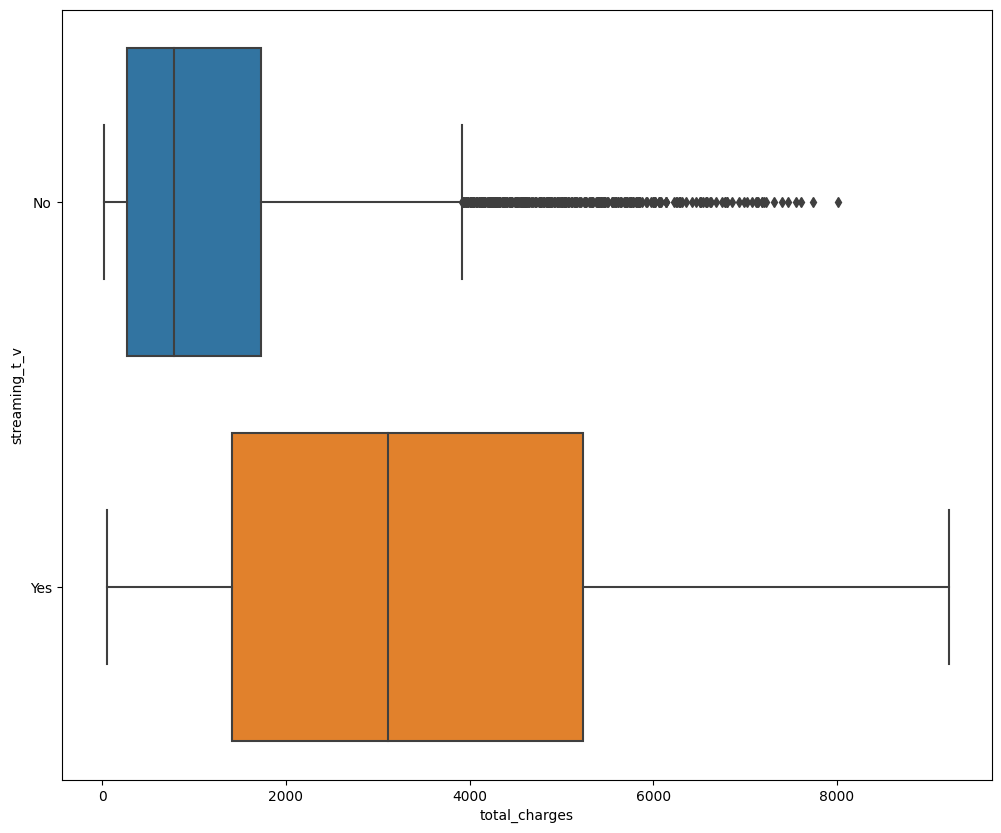

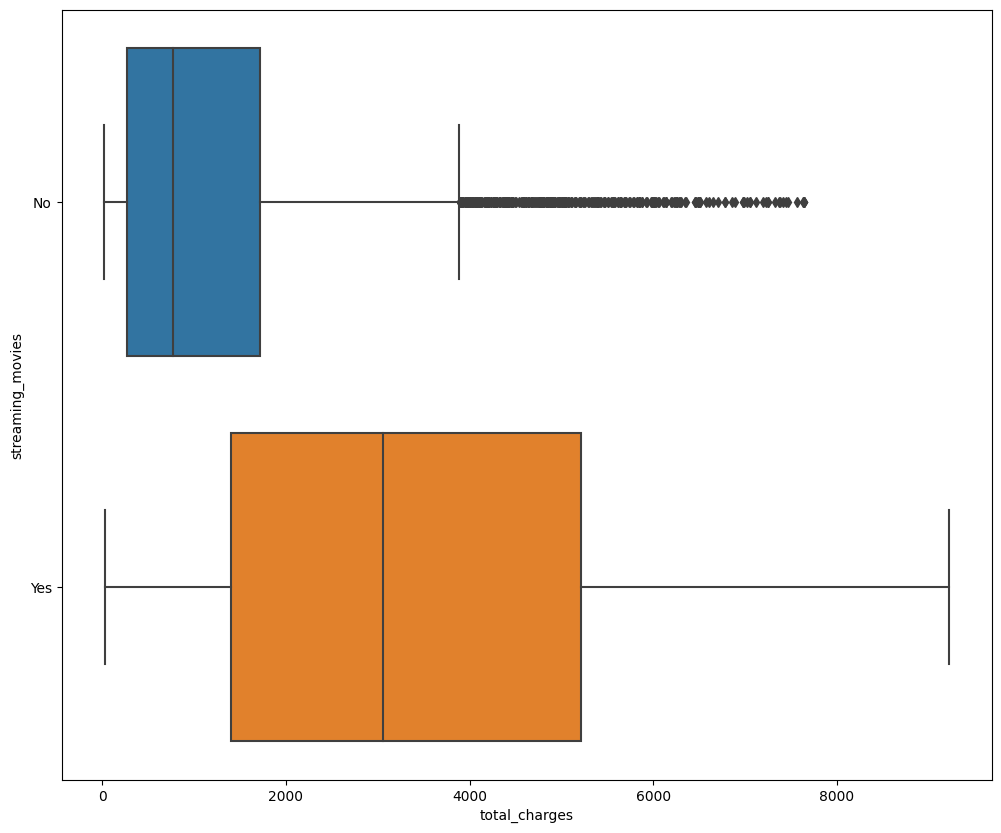

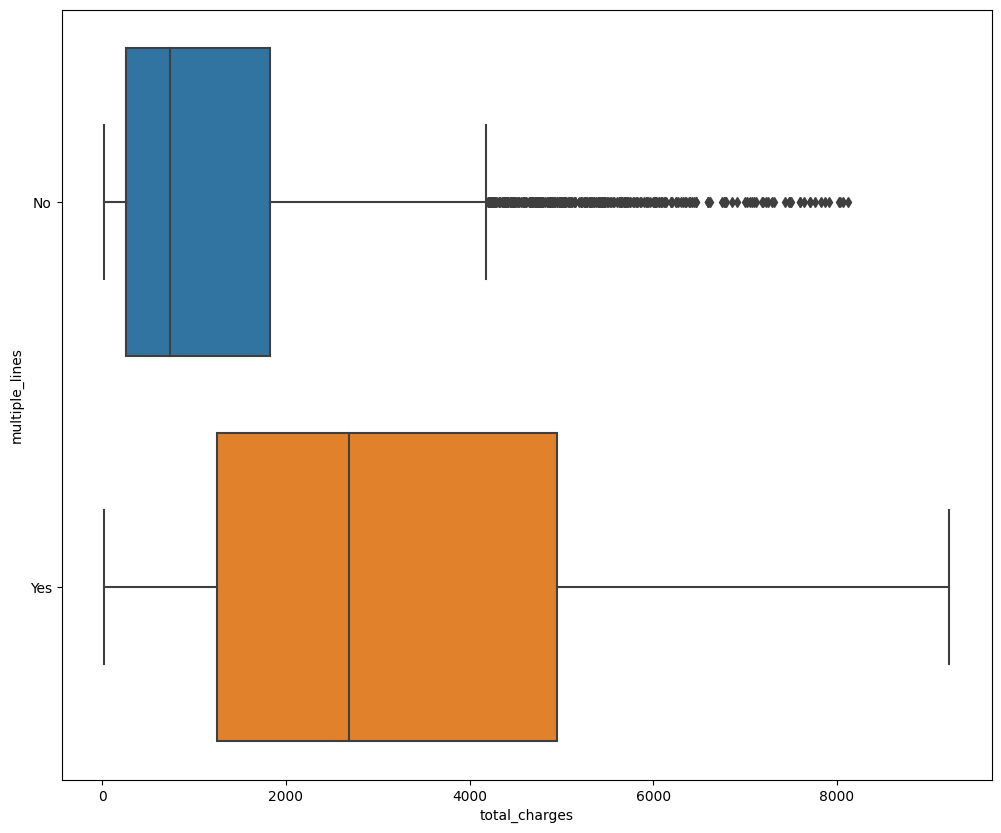

In [50]:
quantitative_columns = ['monthly_charges', 'total_charges', 'days']
categorical_columns = ['type', 'paperless_billing', 'payment_method',
                       'partner', 'dependents', 'internet_service', 'online_security',
                       'online_backup', 'device_protection', 'tech_support', 'streaming_t_v',
                       'streaming_movies', 'multiple_lines']

#визуализация категориальных признаков
for column in categorical_columns:
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(12)
    sns.boxplot(y=column, x='total_charges', data=data)

    plt.show()

По диаграммам размаха видно, что 
- по типу оплаты наиболее выгодны для компании клиенты, которые выбирают оплату на два года, так как пользуются они услугами активнее и приносят больше денег. Клиенты, которые выбирают ежемесячный тип оплаты - тратят на услуги заметно меньше, хотя по диаграмме видно, что среди таких клиентов присутствуют те, кто не совсем рационально тратят деньги (выбросы);
-  клиенты, которые выбирают безналичный расчет тратят на услуги компании больше денег. Возможно, этот связано с возрастом клиентов (молодежь и среднего возраста) - они используют в жизни больше услуг (облачное хранение, стриминговое тв.), а также это может быть связано с психологией - деньги проще отдавать, когда это просто цифры на счету;
- по способу оплаты наиболее прибыльными для компании являются клиенты, которые пользуются банковским переводом или кредитной картой;
- по гендеру различий нет, кто и сколько принес компании прибыли, так как распределение почти одинаковое. (можно убрать данный признак из нашей таблицы - он не повлияет на модель);
- наличие супруга существенно влияет на прибыль компании, возможно, потому что семейные люди чаще проводят время дома и докупают услуги, например, стримингового тв и каталоги фильмов;
- наличие иждивенцев также влиет на прибыльность компании, люди имеющие иждивенцев немного больше тратят на услуги компании. Возможно, это связано с тем, что дети или пенсионеры чаще остаются дома и смотрят тв или пользуются другими услугами;
- наиболее прибыльными клиентами для компании являются люди, пользующиеся интернетом, особенно через оптоволоконный кабель. Вероятнее всего это связано с тем, что скорость передачи выше через оптоволоконный кабель - следовательно, тарифы за интернет наиболее дорогие;
- по оставшимся диаграммам можно сказать, что наиболее прибыльными клиентами для компании являются люди, которые пользуются дополнительными услугами компании (антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity), выделенная линия технической поддержки (TechSupport), облачное хранилище файлов для резервного копирования данных (OnlineBackup), стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies)).

**Идеальный клиент для компании**: человек, который оплачивает услуги сразу на два года за безналичный расчет кредитной картой, имеет партнера и детей или пенсионеровов на иждивении, пользующийся интернетом через оптоволоконный кабель и оплачивающий доп. услуги.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Желательно также посмотреть распределения признаков по ушедшим и оставшимся клиентам.    
    
Для анализа ушедших и оставшихся клиентов удобно применить метод histplot:    
       
https://seaborn.pydata.org/generated/seaborn.histplot.html
    
Например:
    
    sns.histplot(data, x = column, hue = 'target', multiple = 'stack')
    
Такие графики можно построить для числовых и категориальных признаков
    
</div>

In [51]:
data = data.drop(columns=['gender'], axis=1)

In [52]:
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,miss,days,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,0,No,No,Fiber optic,No,No,No,No,No,No,No


**Рассмотрим распределение оставшихся и ушедших клиентов среди параметра 'senior_citizen'.**

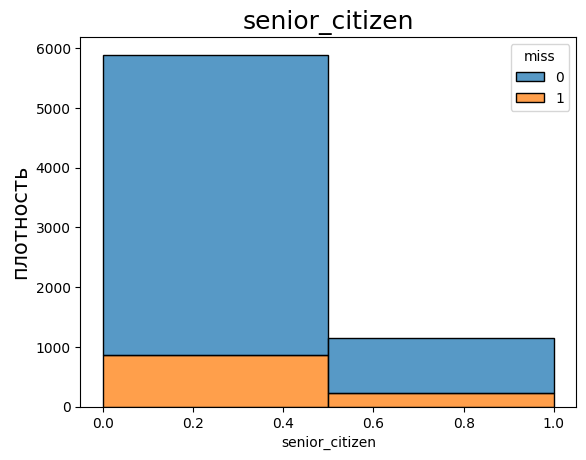

In [53]:
sns.histplot(data, x = 'senior_citizen', hue = 'miss', multiple = 'stack', bins=2)
plt.title('senior_citizen', fontsize=18)
plt.ylabel('плотность', fontsize=15)

plt.show();

Пенсионеров, пользующихся услугами компании, в 6 раз меньше остальных клиентов.

**Рассмотрим распределение среди параметра 'miss' по дням пользования услугами.**

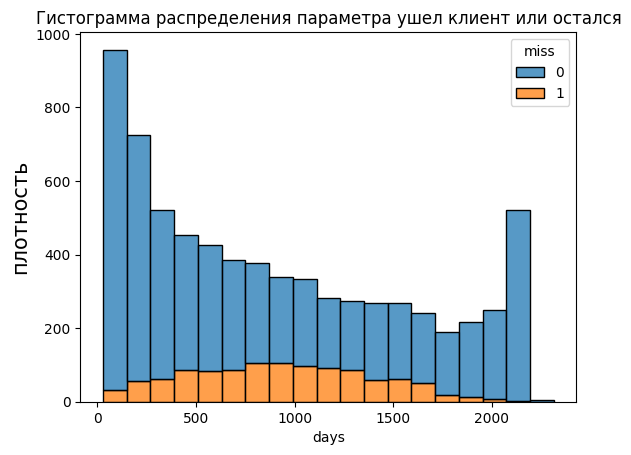

In [54]:
sns.histplot(data, x = 'days', hue = 'miss', multiple = 'stack')
plt.title('miss', fontsize=18)
plt.ylabel('плотность', fontsize=15)
plt.title('Гистограмма распределения параметра ушел клиент или остался')
plt.show();

Чаще всего клиенты уходят в промежут пользования услугами от 500 до 1500 дней.

**Проверим сколько клиентов покидает компанию за первый год пользования услугами.**

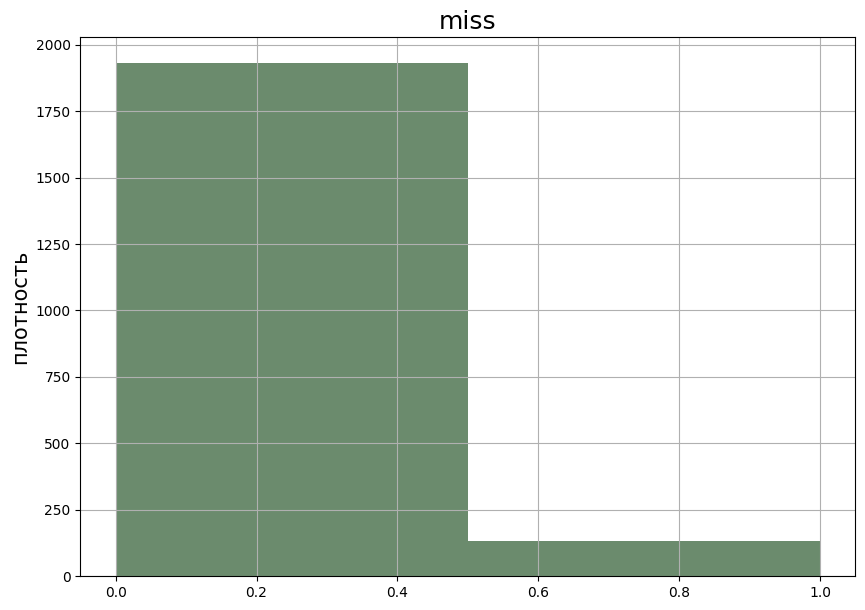

In [55]:
data[data['days'] < 365]['miss'].hist(bins = 2, figsize = (10, 7), color='#6B8B6D');
plt.title('miss', fontsize=18)
plt.ylabel('плотность', fontsize=15)

plt.show();

В течение первого года компанию покидает около 7,5% клиентов. 

Теперь проверим выбросы в количественных признаках.

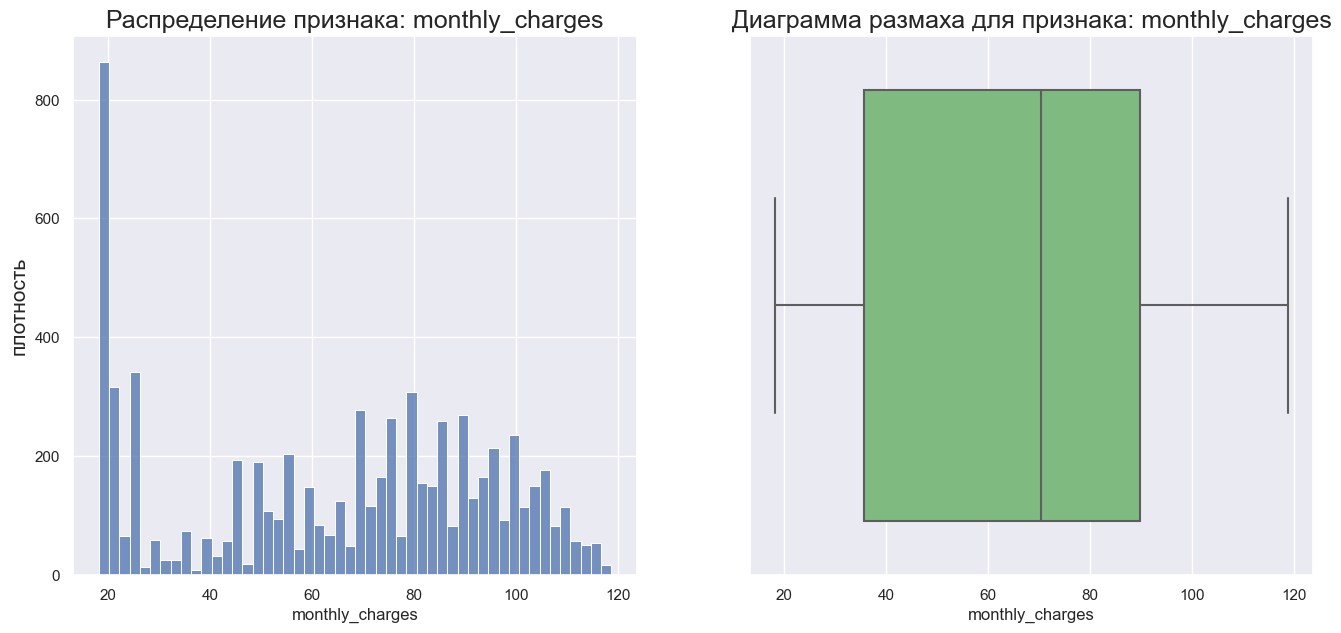

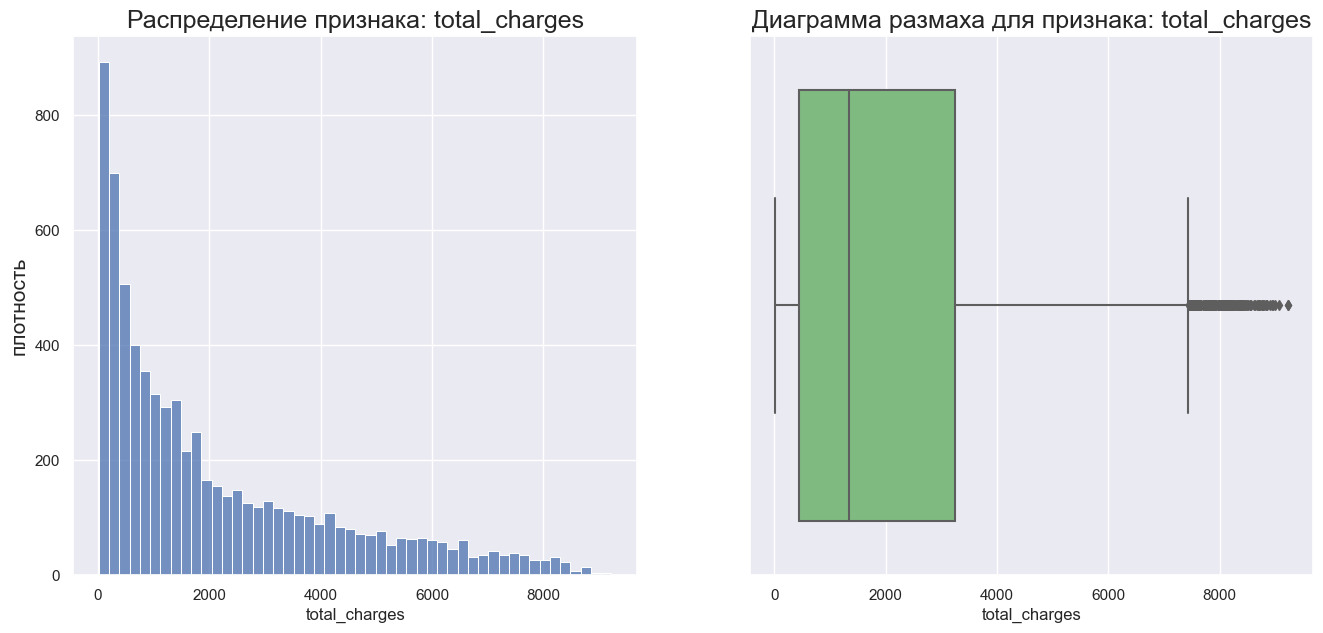

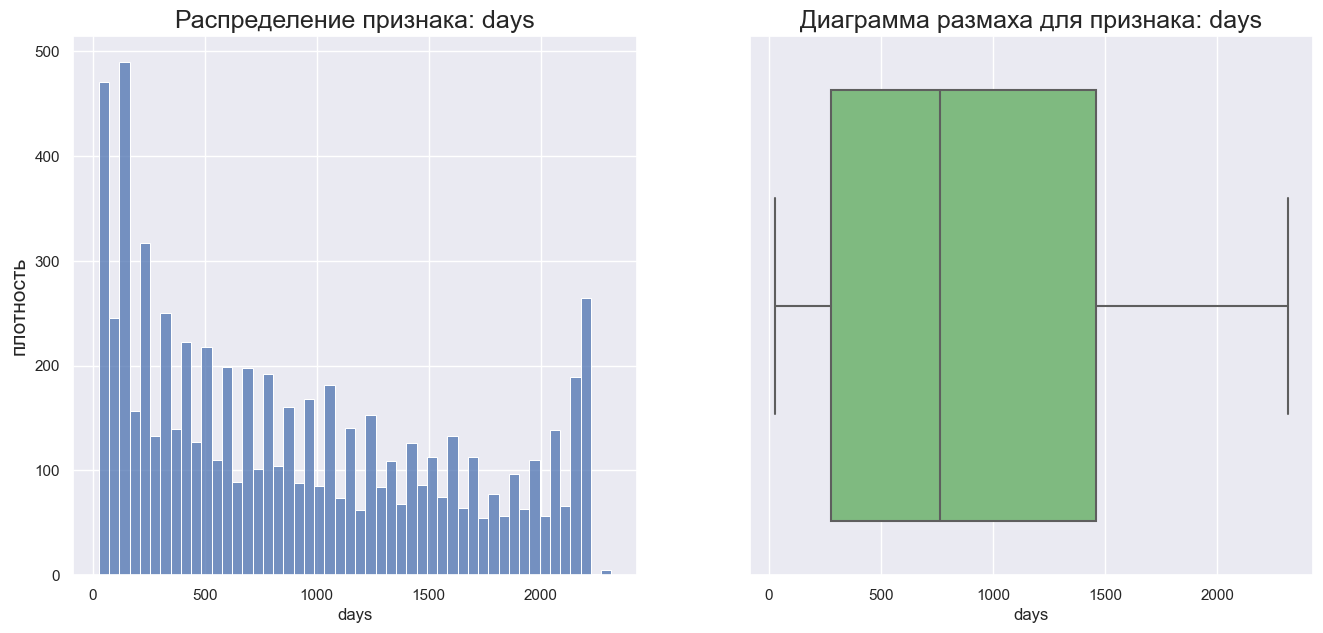

In [56]:
# функция для построения диаграммы размаха и гистограммы
def plot_hist(data, label, bins):
    
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 7));
    axes[0].set_title("Распределение признака: " + label, fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    
    sns.histplot(data, bins=bins, ax=axes[0]);
    sns.boxplot(x=data,
                     palette='Greens_r',
                     ax=axes[1]
                     );

    axes[1].set_title('Диаграмма размаха для признака: ' + label, size=18)
    plt.show();

for column in quantitative_columns:
    plot_hist(data[column], column, 50);

По признаку всего потраченных денег ('total_charges')

In [57]:
print(
round(data[data['total_charges'] > 7000]['total_charges'].count()/len(data['total_charges'])*100, 1), 
                                              '% клиентов, потративших более 7000 единиц в компании')

4.0 % клиентов, потративших более 7000 единиц в компании


**Вывод:**

1. Провели иссловательский анализ данных и выяснили, что наиболее прибыльный клиент для компании, который оплачивает услуги сразу на два года за безналичный расчет кредитной картой, имеет партнера и детей или пенсионеровов на иждивении, пользующийся интернетом через оптоволоконный кабель и оплачивающий доп. услуги.
2. Также выяснили, что в течение первого года компанию покидает около 7,5% клиентов.
3. Подготовили датасет к этапу "Обучение модели".

[Оглавление](#intro).
<a id='task4'></a>

## 4. Обучение моделей

**Сначала разделим общую выборку на 2: признаки и целевой признак.**

In [58]:
target = data['miss'] # целевой признак
features = data.drop(['miss'], axis=1) # признаки

**Разделим данные на 2 выборки: обучающую и тестовую. В соотношении 4:1**

In [59]:
# выделим обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=310723)

Проверим соотношение выборок:

In [60]:
print('Размеры наборов данных:')
print('Обучающая: ', features_train.shape[0])
print('Тестовая:  ', features_test.shape[0])

Размеры наборов данных:
Обучающая:  5274
Тестовая:   1758


Так как у всех признаков разный масштаб, то применим **метод масштабирования - стандартизация данных**.

In [61]:
scaler = StandardScaler()
scaler.fit(features_train[quantitative_columns])

features_train[quantitative_columns] = scaler.transform(features_train[quantitative_columns])
features_test[quantitative_columns] = scaler.transform(features_test[quantitative_columns])

Проверим как изменилась обучающая выборка признаков:

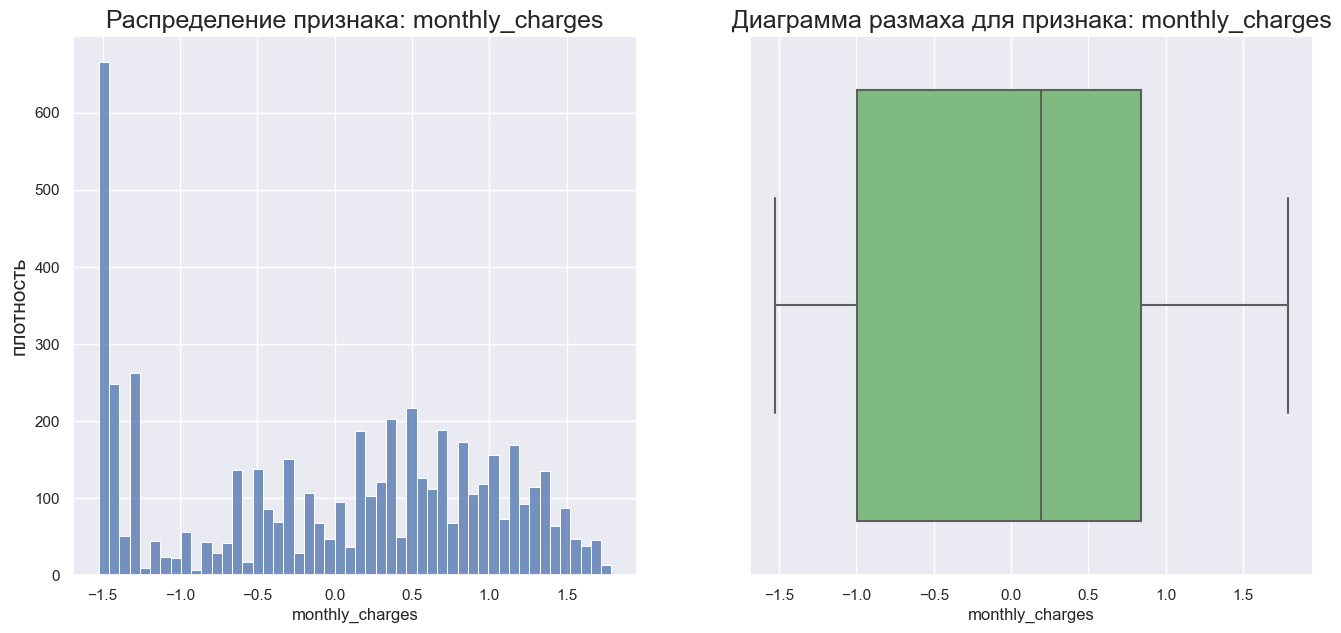

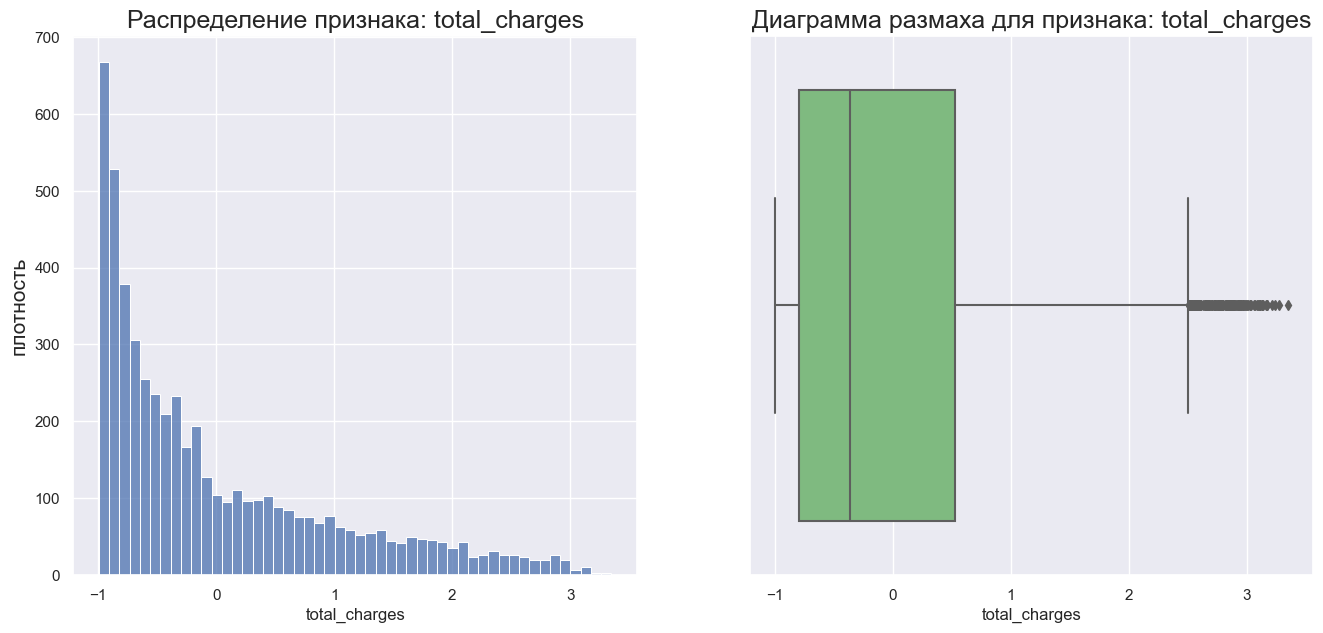

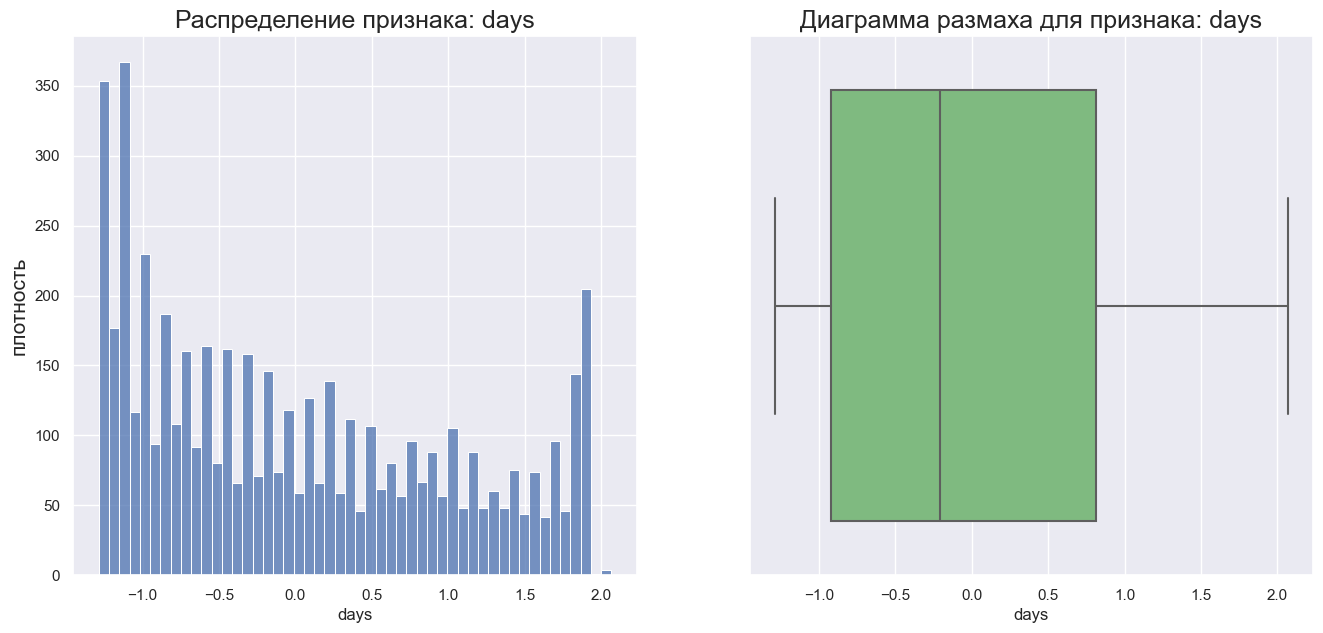

In [62]:
for column in quantitative_columns:
    plot_hist(features_train[column], column, 50);

Данные изменились и теперь распределены, примерно, в одинаковых диапазонах.

**Преобразуем категориальные признаки в численные методом OHE (One-Hot Encoding)**

In [63]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(features_train[categorical_columns])

def features_ohe(ohe_variable, df_features, features_categ):
    df_features_ohe = pd.DataFrame(
        data=ohe_variable.transform(df_features[features_categ]), 
        index=df_features.index,
        columns=ohe_variable.get_feature_names_out()
    )

    df_features = df_features.drop(features_categ, axis=1)
    df_features = df_features.join(df_features_ohe)
    return df_features    

features_train = features_ohe(ohe, features_train, categorical_columns);
features_test = features_ohe(ohe, features_test, categorical_columns);

In [64]:
features_train.head(7)

,monthly_charges,total_charges,days,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_t_v_Yes,streaming_movies_Yes,multiple_lines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7931-PXHFC,-0.069784,-0.329490,-0.346194,0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4385-GZQXV,0.991326,-0.110647,-0.432738,1,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8535-SFUTN,1.387385,2.062977,1.396408,0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2657-ALMWY,0.677779,0.200683,0.013181,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8582-KRHPJ,-0.970819,-0.126698,0.906484,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7408-OFWXJ,0.837853,2.049829,1.886332,0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7544-ZVIKX,1.341178,1.931415,1.264393,0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


Теперь можно приступать к обучению моделей.

[Оглавление](#intro).
<a id='task4.1'></a>

### 4.1 Модель LogisticRegression.

Построим модель LogisticRegression и посчитаем значение метрики AUC-ROC на обучающей выборке.

In [65]:
logreg_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty': ['l1','l2'],
                'max_iter': [5000]}

rsc_logreg = GridSearchCV(LogisticRegression(random_state = 310723, 
                                             class_weight='balanced', 
                                             solver='liblinear'), 
                         logreg_param, 
                         scoring='roc_auc', 
                         cv=5,
                         n_jobs=-1, 
                         verbose=2)

rsc_logreg = rsc_logreg.fit(features_train, target_train)

print('Лучшие параметры для модели LogisticRegression:', rsc_logreg.best_params_)
print(f"Лучшee значение метрики для модели LogisticRegression: {rsc_logreg.best_score_:.3f}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучшие параметры для модели LogisticRegression: {'C': 1000, 'max_iter': 5000, 'penalty': 'l2'}
Лучшee значение метрики для модели LogisticRegression: 0.770


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера v2:</b> Чтобы не прописывать параметры вручную:
    
    model_logreg = rsc_logreg.best_estimator_

</div>

Подставим полученные значения в модель и рассчитаем метрики AUC-ROC и Accuracy.

In [81]:
# построение модели
model_logreg = rsc_logreg.best_estimator_

ac_logreg = abs(np.mean(cross_val_score(model_logreg, features_train, 
                                        target_train, scoring='accuracy', 
                                        cv=5, n_jobs=-1)))

print("Accuracy обучающей выборки:", round(ac_logreg, 3))

Accuracy обучающей выборки: 0.706


[Оглавление](#intro).
<a id='task4.2'></a>

### 4.2 Модель RandomForestClassifier.

Построим модель RandomForestClassifier и посчитаем значение метрики AUC-ROC на обучающей выборке.

In [67]:
forest_param = {
    'n_estimators': [1,300, 20],
    'min_samples_leaf': range(2,10,2),
    'min_samples_split': range(2,10,2),
    'max_features': (2,10,2),
    'max_depth': range(1,15)
}

rsc = RandomizedSearchCV(RandomForestClassifier(random_state = 310723, 
                                                class_weight='balanced'), 
                   param_distributions=forest_param, 
                   scoring='roc_auc', 
                   verbose=False, 
                   cv=3)
rsc = rsc.fit(features_train, target_train)

print(f"Лучшие параметры для модели RandomForestClassifier: {rsc.best_params_}")
print(f"Лучшee значение метрики для модели RandomForestClassifier: {rsc.best_score_:.3f}")

Лучшие параметры для модели RandomForestClassifier: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 2, 'max_depth': 14}
Лучшee значение метрики для модели RandomForestClassifier: 0.813


Подставим полученные значения в модель и рассчитаем метрики AUC-ROC и Accuracy.

In [80]:
# построение модели
model_forest = rsc.best_estimator_

ac_forest = abs(np.mean(cross_val_score(model_forest, features_train, 
                                        target_train, scoring='accuracy', 
                                        cv=5, n_jobs=-1)))

print("Accuracy обучающей выборки:", round(ac_forest, 3))

Accuracy обучающей выборки: 0.785


[Оглавление](#intro).
<a id='task4.3'></a>

### 4.3 Модель CatBoostClassifier.

Построим модель CatBoostClassifier и посчитаем значение метрики AUC-ROC на обучающей выборке. 
(Но предварительно разделим выборки и передадим их в CatBoostClassifier без кодирования.)

In [69]:
features_train_boost, features_test_boost, target_train_boost, target_test_boost = train_test_split(
    data.drop(['miss'], axis=1), data['miss'], test_size=0.25, random_state=310723)

In [70]:
params = {
    'learning_rate':[0.1, 0.6],
    'depth':[2, 10],
    'iterations': [100, 200, 300, 400, 500],
    'eval_metric' : ['AUC']
    
}

grid_cat = RandomizedSearchCV(CatBoostClassifier(random_state=310723, 
                                                 auto_class_weights='Balanced', 
                                                 silent=True),
                    param_distributions=params,
                    cv=5,
                    scoring='roc_auc',
                    verbose=False)

grid_cat.fit(features_train_boost, target_train_boost, cat_features=categorical_columns)

print(f"Лучшие параметры для модели CatBoostClassifier: {grid_cat.best_params_}")
print(f"Лучшee значение метрики для модели CatBoostClassifier: {grid_cat.best_score_:.3f}")

Лучшие параметры для модели CatBoostClassifier: {'learning_rate': 0.6, 'iterations': 300, 'eval_metric': 'AUC', 'depth': 2}
Лучшee значение метрики для модели CatBoostClassifier: 0.910


Подставим полученные значения в модель и рассчитаем метрики AUC-ROC и Accuracy.

In [84]:
model_cat = grid_cat.best_estimator_

In [85]:
ac_cat = cross_val_score(model_cat, features_train, target_train, scoring='accuracy', cv=5).mean()

print("Accuracy обучающей выборки:", round(ac_cat, 3))

Accuracy обучающей выборки: 0.882


Соберем все полученные данные в таблицу.

In [73]:
metrics = {'AUC-ROC_train':[rsc_logreg.best_score_, rsc.best_score_, grid_cat.best_score_],
           'Accuracy_train':[ac_logreg, ac_forest, ac_cat]}

table = pd.DataFrame(metrics)
table.index = ['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier']

pd.set_option('display.float_format', '{:.3f}'.format)
display(table)

,AUC-ROC_train,Accuracy_train
LogisticRegression,0.770,0.706
RandomForestClassifier,0.813,0.768
CatBoostClassifier,0.910,0.884


**Вывод:**

1. Как видно из таблицы, на обучающей выборке наибольшее значение метрики AUC-ROC достигла модель CatBoostClassifier со значением 0,910.
2. Ниже, но в пределах заявленных целями значений остается метрика у модели RandomForestClassifier - 0,813.
3. Проведем тестирование на модели CatBoostClassifier.

[Оглавление](#intro).
<a id='task5'></a>

## 5. Тестирование

In [86]:
ra_cat = roc_auc_score(target_test_boost, model_cat.predict_proba(features_test_boost)[:, 1])
ac_cat = accuracy_score(target_test_boost, model_cat.predict(features_test_boost))

print("AUC-ROC тестовой выборки:", round(ra_cat, 3))
print("Accuracy тестовой выборки:", round(ac_cat, 3))

AUC-ROC тестовой выборки: 0.926
Accuracy тестовой выборки: 0.886


Построим ROC кривую для тестовой выборки.

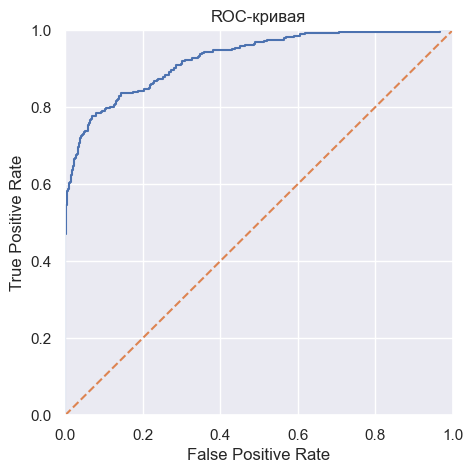

In [87]:
fpr, tpr, thresholds = roc_curve(target_test_boost, model_cat.predict_proba(features_test_boost)[:, 1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# добавим к графику заголовок "ROC-кривая" функцией plt.title() 
plt.title('ROC-кривая')
plt.show()

Проанализируем важность признаков при предсказании результатов для тестовой модели.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'type'),
  Text(1, 0, 'paperless_billing'),
  Text(2, 0, 'payment_method'),
  Text(3, 0, 'monthly_charges'),
  Text(4, 0, 'total_charges'),
  Text(5, 0, 'days'),
  Text(6, 0, 'senior_citizen'),
  Text(7, 0, 'partner'),
  Text(8, 0, 'dependents'),
  Text(9, 0, 'internet_service'),
  Text(10, 0, 'online_security'),
  Text(11, 0, 'online_backup'),
  Text(12, 0, 'device_protection'),
  Text(13, 0, 'tech_support'),
  Text(14, 0, 'streaming_t_v'),
  Text(15, 0, 'streaming_movies'),
  Text(16, 0, 'multiple_lines')])

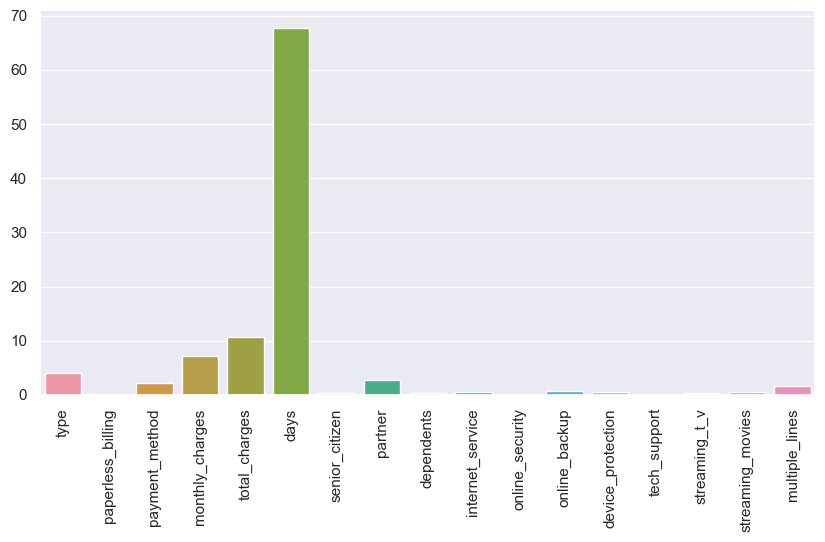

In [88]:
plt.figure(figsize=(10, 5))
sns.barplot(y=model_cat.feature_importances_, x=features_test_boost.columns)

plt.xticks(rotation=90)

<div class="alert alert-info"> <b>ℹ️ Комментарий студента: </b> Спасибо, за рекомендации, постарался добавить анализ значимости и ROC кривую) </div>

**Вывод:**

Наибольшее значение метрики AUC-ROC достигла модель CatBoostClassifier со значением 0.910, затем модель RandomForestClassifier со значением метрики - 0.813.

По результатам этапа "Обучение моделей" проведели тестирование лучшей модели CatBoostClassifier. Результаты метрики получились AUC_ROC = 0.926, Accuracy = 0.889. 

Для тестовой моделе построили ROC кривую. А также сделали анализ значимости признаков предсказания для модели. Анализ показал, что наиболее значимыми признаками являются - количество дней, проведенных с данной компанией (лояльность клиентов - 'days'), всего потрачено денег на услуги ('total_charges'), ежемесячные траты на услуги ('monthly_charges'), тип оплаты ('type') и способ оплаты ('payment_method').

[Оглавление](#intro).
<a id='task6'></a>

## 6. Отчет по работе

На этапе **"Изучение общей информации"**

1. Импортировали необходимые библиотеки.
2. Считали данные из csv-файла.
3. Ознакомились с общей информацией по каждому датасету.

На этапе **"Предобработка данных"**

1. Исправили названия столбцов.
2. Изменили тип данных некоторых признаков там, где это было необходимо.
3. Датасеты объединены в одну общую таблицу для дальнейшего анализа. 
4. Пропуски устранены.

На этапе **"Исследовательский анализ данных"**

1. Провели иссловательский анализ данных и выяснили, что наиболее прибыльный клиент для компании, который оплачивает услуги сразу на два года за безналичный расчет кредитной картой, имеет партнера и детей или пенсионеровов на иждивении, пользующийся интернетом через оптоволоконный кабель и оплачивающий доп. услуги.
2. Также выяснили, что в течение первого года компанию покидает около 7,5% клиентов.
3. Чаще всего клиенты уходят в промежут пользования услугами от 500 до 1500 дней.
4. Для обучения были выбраны следующие признаки:
       - 'type',
       - 'paperless_billing',
       - 'payment_method',
       - 'monthly_charges',
       - 'total_charges',
       - 'days',
       - 'senior_citizen',
       - 'partner',
       - 'dependents',
       - 'internet_service',
       - 'online_security',
       - 'online_backup',
       - 'device_protection',
       - 'tech_support',
       - 'streaming_t_v',
       - 'streaming_movies',
       - 'multiple_lines'.

На этапе **"Обучение моделей"**

Наибольшее значение метрики AUC-ROC достигла модель CatBoostClassifier со значением 0.910, затем модель RandomForestClassifier со значением метрики - 0.813.


По результатам этапа "Обучение моделей" проведели **тестирование лучшей модели** CatBoostClassifier. Обучащая выборка соотносится с тестовой как 4:1 (test_size=0.25). 

Размеры наборов данных:
- Обучающая:  5274
- Тестовая:   1758

**Параметры итоговой модели CatBoostClassifier:** learning_rate= 0.6, iterations= 300, eval_metric= AUC, depth= 2,  **random_state=310723**


Результаты метрики на тестовом наборе данных получились **AUC_ROC = 0.926, Accuracy = 0.889**. 

Отступлений от исходного плана работ не было. Все пункты выполнены в точном порядке. 

Сложности были в определении признаков для обучения моделей (нехватка опыта скорее). Но данную трудность решил вебинар с тимлидом - почерпнул для себя новое, что из тех признаков, которые у тебя есть можно и нужно создать новые, которые, может быть, даже объединяют те, что есть в исходных данных. 

Считаю, что все этапы проделанной работы важны в одинаковой степени. По сути, пока не проделал один этап, переходить к другому просто бессмысленно. И только, проделав все этапы, можно получить хорошую или хотя бы адекватную модель. 
